In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras.layers import Input , Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
sns.set_style('darkgrid')
from tensorflow.python.keras.utils.vis_utils import plot_model
print("Version of tensorflow is : ", tf.__version__)

In [10]:
X = np.arange(-100 , 101 , 1)

Y1 = X * 100 + np.random.normal(size=(X.shape[0]))
Y2 = X *   5 + np.random.normal(size=(X.shape[0]))

In [6]:
print("Shape of X : ",X.shape)
print("Shape of Y1 : ",Y1.shape)
print("Shape of Y2 : ",Y2.shape)

Shape of X :  (201,)
Shape of Y1 :  (201,)
Shape of Y2 :  (201,)


In [13]:
ind = np.arange(X.shape[0])
np.random.shuffle(ind)

In [17]:
mean_X = X.mean()
X = X - mean_X
std_X = X.std()
X = X / std_X

mean_Y1 = Y1.mean()
Y1 = Y1 - mean_Y1
std_Y1 = Y1.std()
Y1 = Y1 / std_Y1

mean_Y2 = Y2.mean()
Y2 = Y2 - mean_Y2
std_Y2 = Y2.std()
Y2 = Y2 / std_Y2

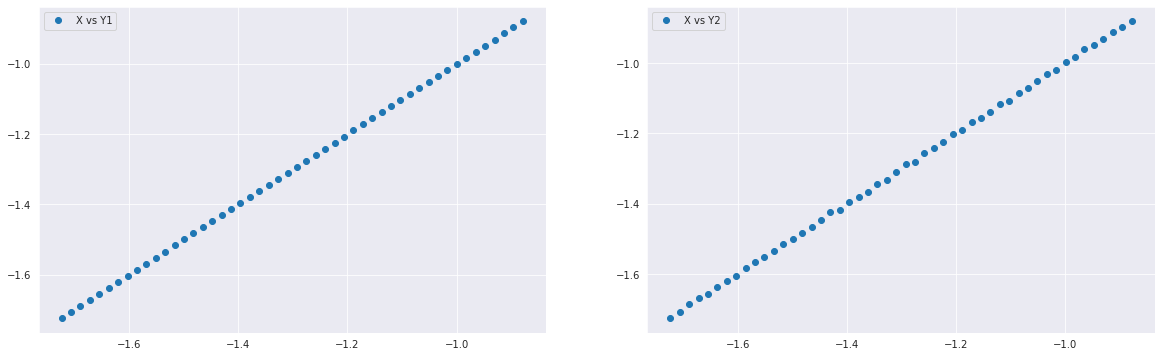

In [20]:
_ , ax = plt.subplots(1 , 2 , figsize = (20,6))
ax[0].plot(X[:50] , Y1[:50] , 'o' , label="X vs Y1")
ax[1].plot(X[:50] , Y2[:50] , 'o' , label="X vs Y2")
ax[0].legend()
ax[1].legend()

In [23]:
def get_base_model():
    input = Input(shape=[1] , name="input_layer")
    layer1 = Dense(1 , name="layer_for_y1")(input)
    layer2 = Dense(1 , name="layer_for_y2")(input)

    model = Model(inputs = input , outputs = [layer1 , layer2])
    model.compile(optimizer = SGD() ,
                  loss = {
                      "layer_for_y1" : tf.keras.losses.mean_squared_error,
                      "layer_for_y2" : tf.keras.losses.mean_squared_error
                  },
                  metrics = {
                      "layer_for_y1" : tf.keras.losses.mean_absolute_error,
                      "layer_for_y2" : tf.keras.losses.mean_absolute_error
                  }
                )
    return model

In [24]:
model = get_base_model()
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
layer_for_y1 (Dense)            (None, 1)            2           input_layer[0][0]                
__________________________________________________________________________________________________
layer_for_y2 (Dense)            (None, 1)            2           input_layer[0][0]                
Total params: 4
Trainable params: 4
Non-trainable params: 0
__________________________________________________________________________________________________


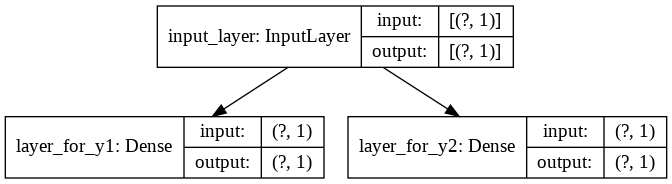

In [27]:
plot_model(model , to_file="my_model.png" , show_shapes=True , show_layer_names=True)

In [29]:
X_train  = X[ind[:150]]
Y1_train = Y1[ind[:150]]
Y2_train = Y2[ind[:150]]

X_test   = X[ind[150:]]
Y1_test  = Y1[ind[150:]]
Y2_test  = Y2[ind[150:]]

In [31]:
print("Shape of X_train : ",X_train.shape)
print("Shape of Y1_train : ",Y1_train.shape)
print("Shape of Y2_train : ",Y2_train.shape)
print("-------------------------------------------")
print("Shape of X_test : ",X_test.shape)
print("Shape of Y1_test : ",Y1_test.shape)
print("Shape of Y2_test : ",Y2_test.shape)

Shape of X_train :  (150,)
Shape of Y1_train :  (150,)
Shape of Y2_train :  (150,)
-------------------------------------------
Shape of X_test :  (51,)
Shape of Y1_test :  (51,)
Shape of Y2_test :  (51,)


In [32]:
his = model.fit(X_train ,
                [Y1_train , Y2_train] ,
                batch_size=32 ,
                epochs=500 ,
                validation_batch_size=32 , 
                validation_data=(X_test , [Y1_test , Y2_test]))

5/5 [==============================] - 0s 8ms/step - loss: 1.1430e-05 - layer_for_y1_loss: 2.6236e-08 - layer_for_y2_loss: 1.1404e-05 - layer_for_y1_mean_absolute_error: 1.2598e-04 - layer_for_y2_mean_absolute_error: 0.0027 - val_loss: 9.0175e-06 - val_layer_for_y1_loss: 3.2276e-08 - val_layer_for_y2_loss: 8.9852e-06 - val_layer_for_y1_mean_absolute_error: 1.4160e-04 - val_layer_for_y2_mean_absolute_error: 0.0025
Epoch 478/500
5/5 [==============================] - 0s 7ms/step - loss: 1.1435e-05 - layer_for_y1_loss: 2.6211e-08 - layer_for_y2_loss: 1.1409e-05 - layer_for_y1_mean_absolute_error: 1.2593e-04 - layer_for_y2_mean_absolute_error: 0.0027 - val_loss: 9.0165e-06 - val_layer_for_y1_loss: 3.2296e-08 - val_layer_for_y2_loss: 8.9842e-06 - val_layer_for_y1_mean_absolute_error: 1.4162e-04 - val_layer_for_y2_mean_absolute_error: 0.0025
Epoch 479/500
5/5 [==============================] - 0s 7ms/step - loss: 1.1426e-05 - layer_for_y1_loss: 2.6242e-08 - layer_for_y2_loss: 1.1400e-05 - la

In [41]:
data = [150 , 200 , 300 , 400]
pred = model.predict((data - mean_X) / std_X)

In [47]:
for i in range(len(data)):
    X = data[i]
    Y1 , Y2 = pred[0][i , 0] , pred[1][i , 0]
    Y1 = Y1 * std_Y1 + mean_Y1
    Y2 = Y2 * std_Y2 + mean_Y2

    print("X : %4.3f  |  Y1  : %4.3f  |  Y2  : %4.3f "%(X,Y1,Y2))

X : 150.000  |  Y1  : 14999.601  |  Y2  : 750.133 
X : 200.000  |  Y1  : 19999.475  |  Y2  : 1000.158 
X : 300.000  |  Y1  : 29999.225  |  Y2  : 1500.210 
X : 400.000  |  Y1  : 39998.973  |  Y2  : 2000.261 
